# <center>Diamonds</center>
----


## The Imports

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_pickle("../data/diamonds.pkl")

---

## How this started

Years ago, I was tooling around on, I think, either the [UVA Darden Graduate School of Business](https://www.darden.virginia.edu/) or the [Harvard Business School](https://www.hbs.edu/Pages/default.aspx) website and came across a dataset called "Sarah gets a diamond". Apparently, it's a fairly well known dataset amongst the MBA crowd and you can still [find it for sale](https://hbsp.harvard.edu/product/UV0869-PDF-ENG) on the web. I saved it for future use because I thought it was easily graspable and pretty good for a regression model. 

At least, I thought this was the same dataset. In hindsight, I don't think it is because that dataset currently says it has the prices for 6000 diamonds and this has considerably more at 219,704 rows. So far as I'm aware, this is the largest dataset of diamonds prices available.

If you're interested in developing a bit of domain knowledge, the [history of how diamonds are graded](https://www.thediamondauthority.org/the-diamond-grading-system/) is interesting but, unlike the links for the terms below which are of immediate relevance, I recommend you read it later.

## Background information to get you talking like an expert in no time

### The 4Cs -- the main variables that determine value, according to the diamond industry:

# <center>Cut, Color, Clarity, and Carat Weight</center>

In [3]:
df

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,N,...,8.66,M,STK,unknown,None,unknown,unknown,unknown,unknown,1210692
219700,Radiant,fancy,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,unknown,...,5.71,TK,XTK,unknown,None,Green,unknown,None,Fancy Light,1292500
219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,N,...,10.20,TN,M,unknown,None,unknown,unknown,unknown,unknown,1315496
219702,Princess,fancy,SI2,0.90,unknown,GIA,Good,Good,unknown,N,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


### Rather than go though all the details for all the columns, I'll summarize and provide links
Here is a brief rundown of the columns as well as links to some background information to get you talking like an expert in no time.

* `cut` refers to one of the 10 or so most [common diamond cuts](https://www.lumeradiamonds.com/diamond-education/diamond-shape). This dataset has an additional one called the 'Cushion Modified'.
![Diamond Shapes](../images/Diamond_shapes.png)
* `color` Clear diamonds are graded D-Z. The [higher letters are more yellowish](https://www.lumeradiamonds.com/diamond-education/diamond-color) but are [often better values](https://www.diamonds.pro/education/color/) since the color is hard to determine once in a ring.
* `clarity` refers to the inclusions (i.e., [internal flaws](https://4cs.gia.edu/en-us/diamond-clarity/)) in the diamonds seen through a jeweler's loupe or microscope. [Fewer and smaller are better](https://www.diamonds.pro/education/clarity/).
* `carat_weight` Refers to the mass of the diamond. It's loosely connected with the dimensions of a diamond but `cut` and `cut_quality` tends to play an equally large if not larger role.
* `cut_quality` refers to the [GIA Cut Grading System](https://www.gemsociety.org/article/gias-new-diamond-cut-grading-system/) which was developed in 2005 and is the de facto standard. 
* `lab` is the grading lab. The big three are GIA, IGI, and HRD. Each diamond gets a lab certificate that [looks like this](https://www.i-diamants.com/en/diamond-certificates-gia-igi-hrd.html,00026).
* `polish` and `symmetry` are what you would expect.
* `eye-clean` refers to the blemishes or inclusions that can be seen with the naked eye. [There are 10 grades](https://www.diamonds.pro/education/eye-clean-diamonds/).
* `culet_size` is the size of the circle you'd see if you looked straight down. [None is ideal](https://www.diamonds.pro/education/diamond-culet/) because the maximum amount of light gets reflected.
* `culet_condition` indicates if the culet has any chipping, which is why some diamonds don't close to a point but rather a very small flat spot. 
* `fancy_color_` columns have to do with colored diamonds. Formerly, extremely rare but now common, popular, and almost always lab-grown.
* `fluor` columns refer to the effect of longwave UV light. [According to GIA](https://4cs.gia.edu/en-us/blog/understanding-diamond-fluorescence/) 25-35% have it; for ~10% of those it's noticeable to an expert.
* `depth_percent`and`table_percent` are the relative measurements of the flat part of the top and the depth. This varies somewhat by cut.
* `meas_length`, `meas_width`, `meas_depth` are the absolute measurements of stone. 
* `girdle min/max` is where the id of a stone is [engraved](https://www.gemsociety.org/article/diamond-girdles/) they also are where the meets the setting and plays a role in reflection. There are [9 values](https://beyond4cs.com/grading/girdle-thickness) ranging from extremely thin to extremely thick
* `fancy` columns refer to colored diamonds. They can be natural like the extremely rare blue diamonds, or lab-grown. The columns refer to the colors, secondary colors, and their intensity.
* `total_sales_price` is priced in dollars.


In [23]:
col_list =  df.columns.values.tolist()
            
for col in col_list:
    print(f" '{col}' has the following values: \n \t {df[col].unique()} \n")

 'cut' has the following values: 
 	 ['Round' 'Pear' 'Oval' 'Marquise' 'Princess' 'Emerald' 'Heart' 'Cushion'
 'Radiant' 'Cushion Modified' 'Asscher'] 

 'color' has the following values: 
 	 ['E' 'F' 'L' 'D' 'J' 'I' 'G' 'H' 'M' 'K' 'fancy'] 

 'clarity' has the following values: 
 	 ['VVS2' 'VVS1' 'I1' 'VS1' 'VS2' 'IF' 'SI2' 'I2' 'SI1' 'SI3' 'I3'] 

 'carat_weight' has the following values: 
 	 [ 0.09  0.08  0.34  0.3   0.1   0.11  0.35  0.13  0.17  0.31  0.12  0.32
  0.4   0.23  0.14  0.18  0.15  0.24  0.33  0.25  0.19  0.16  0.21  0.26
  0.41  0.37  0.39  0.42  0.27  0.49  0.29  0.22  0.36  0.7   0.2   0.38
  0.53  0.28  0.5   0.43  0.51  0.47  0.45  0.46  0.54  0.55  0.58  0.48
  0.44  0.52  0.6   0.64  0.59  0.56  0.61  0.71  0.72  0.74  0.8   0.63
  0.76  0.66  0.57  0.85  0.94  1.04  0.86  0.75  0.62  0.69  0.81  0.91
  0.73  0.9   0.65  0.67  1.03  0.68  1.    1.01  1.02  0.79  1.11  0.77
  0.99  0.92  1.23  1.1   1.2   0.93  0.96  0.82  0.83  0.84  1.05  0.78
  0.95  1.13  0.8

## Preliminary EDA

#### Getting a sense of the numeric data

In [4]:
df.shape

(219704, 25)

In [5]:
df.describe()

,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,219704.000000,219704.000000,219704.000000,219704.000000,219704.000000,219704.000000,2.197040e+05
mean,0.755176,61.683794,57.747579,5.548867,5.135623,3.285698,6.908035e+03
std,0.845892,9.915251,9.959906,1.763932,1.374527,2.054817,2.595944e+04
min,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,0.310000,61.200000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,0.500000,62.400000,58.000000,5.060000,4.800000,3.030000,1.970000e+03
75%,1.000000,63.500000,60.000000,6.350000,5.700000,3.630000,5.207000e+03
max,19.350000,98.700000,94.000000,93.660000,62.300000,76.300000,1.449881e+06


I found a few things interesting here: Comparing the mean, the median, and the 75% we see this is heavily skewed both with lots of small diamonds but also with few large and expensive stones. That brings us to ...

## Outliers (part I)

#### Outliers are normally defined as:
<br>

<center>${\large[}Q_{1}-k(Q_{3}-Q_{1}), Q_{3}+k(Q_{3}-Q_{1}){\large ]}$ </center>
                
                     
But in this case it turns out there are a number of large diamonds and they're mostly evenly dispersed in size.

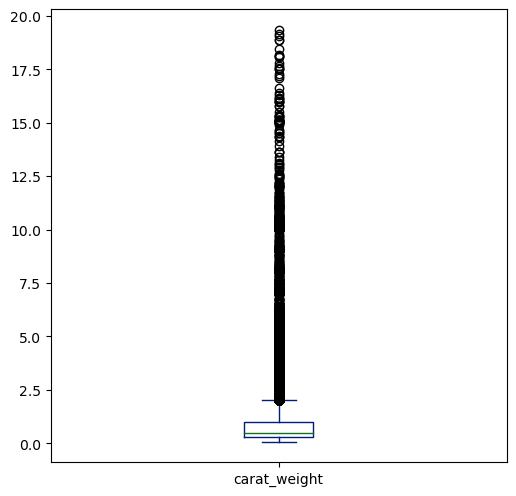

In [6]:
sns.set_palette(palette='dark', n_colors=14)
df['carat_weight'].plot(kind='box',figsize=(20,20),subplots=True,layout=(3,3))

plt.show()

Let's look at them separately starting with the teeny, tiny little elephants in the room: melee diamonds

## Outliers (part 2)
<br>

[Melee diamonds](https://4cs.gia.edu/en-us/blog/melee-diamonds-tiny-diamonds-big-impact/) are generally defined as diamonds that are less than or equal to .2 carats. They're used to proved a lot of refection without a lot of size. As you can see on the next three charts (they're the ones to the left of pink vertical line) they make up a negligible amount of the total.

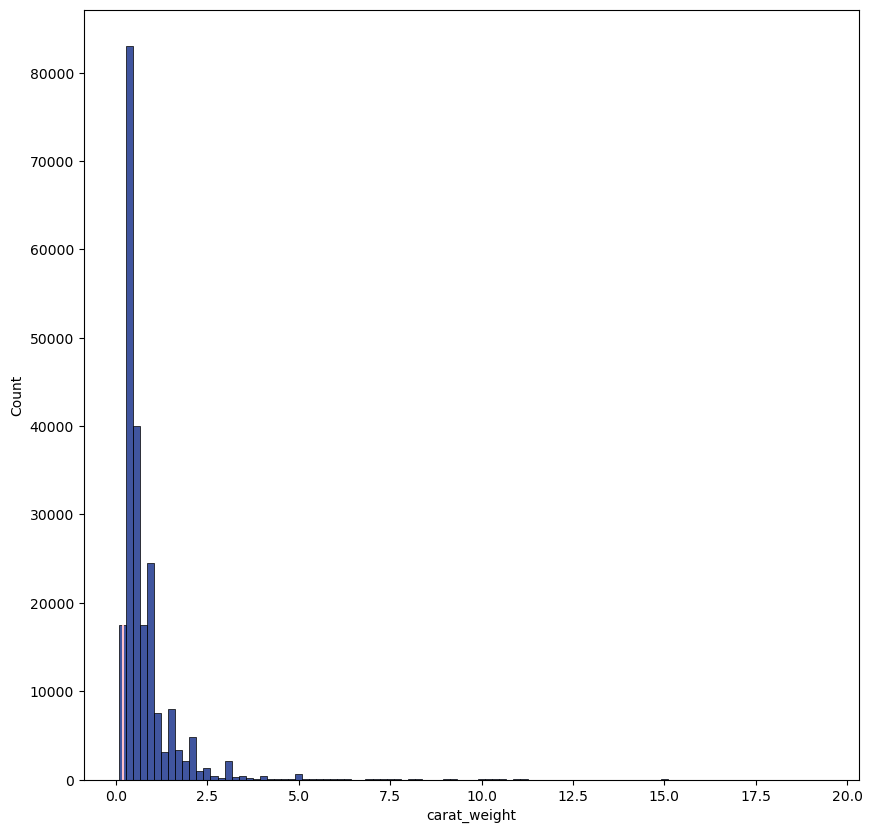

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(data=df, x="carat_weight", bins=100)
plt.axvline(.2, 0.0, 0.2,  c='pink')

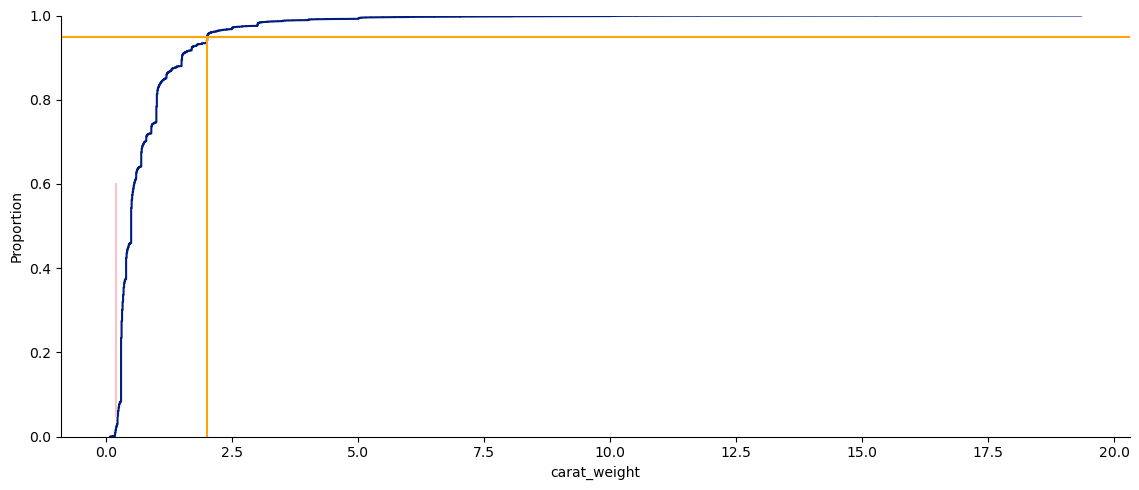

In [8]:
sns.displot(df, x="carat_weight", aspect=2.3,  kind="ecdf")
# melee diamonds (<.2 carats)
plt.axvline(.2, 0.05, 0.6, c='pink')

# The top 5% of diamonds in terms of carat_weight are greater than or equal 2.0 carats
plt.axvline(2.0, 0.0, 0.95, c='orange')
plt.axhline(.95, 0.0, c='orange')

Additionally, [this lady](https://slate.com/human-interest/2013/01/dear-prudence-is-my-engagement-ring-diamond-too-small.html) has a 1/6 carat (.166) stone. Admittedly, it's an N of 1 but this is a world-wide market and not just a US market.

You would think there there would be some stones we could rule out. The smallest size `df['size'].min()` is .08 carats and if we take everything at `df.loc[df['size'] <= .2]` and below that only 4805 rows -- about 2% of the total number of entries in database. 

If we take her stone as amongst (but not quite) the smallest and eliminate anything smaller than .15 carat, we'd only eliminate a total of 263 rows.

The real answer, at least for the lower end, is best found statistically. From the box and whiskers in Cell 5 above, there aren't any outliers at the lower end.

## Outliers (part 3)

But what about the upper end? Shouldn't we eliminate them? Like, who the heck is going to have a 18 carat ring?

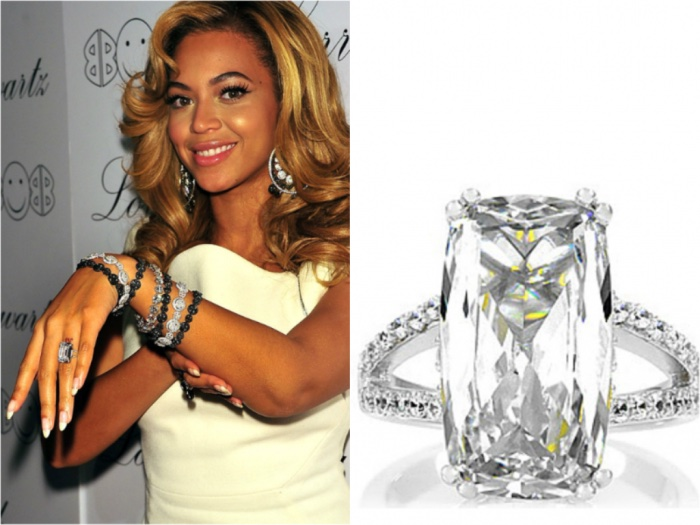

##### Oh . . . her. 
##### Wow. That's . . . that's quite impressive. Oh, and those tiny ones going around the band -- those are melee stones.

But, setting aside the impressiveness of that ring, there are some reasons why not to remove outliers in this case. Namely, the data is extremely unlikely to be due an error in collection, and it's not clear if the outliers will affect the model results or not. Some estimators are highly sensitive to outliers; others aren't. But transforming the data would handle it either way.


---

# EDA -- starting with the basics

Sicking with the Cut, Color, Clarity, and Carat Weight order above ...

## Cut

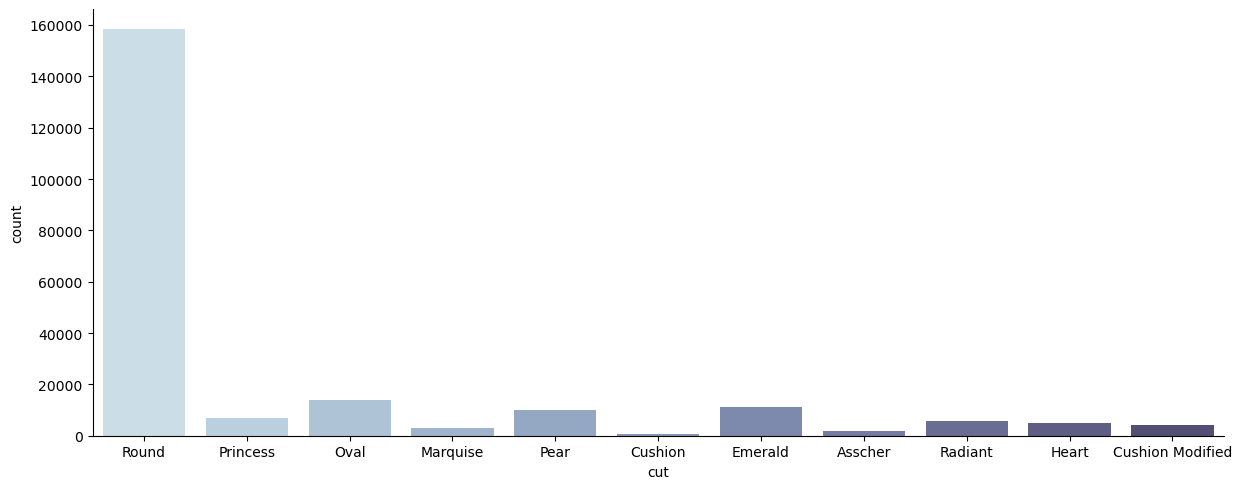

In [9]:
sns.set_palette(palette="ch:s=.25,rot=-.25", n_colors=14)
shapes = ['Round', 'Princess', 'Oval', 'Marquise', 'Pear', 'Cushion', 'Emerald', 'Asscher', 'Radiant', 'Heart', 'Cushion Modified']

sns.catplot(x='cut', data=df, kind='count', order=shapes, aspect=2.5)

#df['shape'].value_counts()

I think it's fair to say it's no surprise that round diamonds make up the vast majority. While we can't get the reason from the dataset, the short answer is twofold: round diamonds give the most sparkle per carat but also there issues of taste and expectation.
Here's that graphic again to help in visualizing the shapes
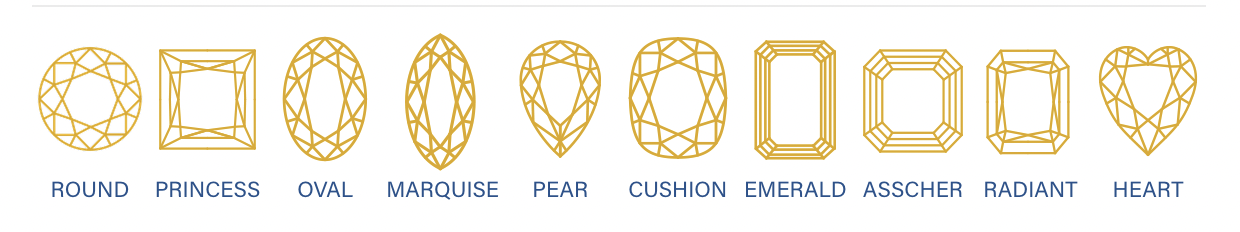

In [10]:
round_cut = df['cut'].value_counts()['Round']
pricess_cut = df['cut'].value_counts()['Princess']
oval_cut = df['cut'].value_counts()['Oval']
marquise_cut = df['cut'].value_counts()['Marquise']
pear_cut = df['cut'].value_counts()['Pear']
cushion_cut = df['cut'].value_counts()['Cushion']
emerald_cut = df['cut'].value_counts()['Emerald']
asscher_cut = df['cut'].value_counts()['Asscher']
radiant_cut = df['cut'].value_counts()['Radiant']
heart_cut = df['cut'].value_counts()['Heart']
cushion_modified_cut = df['cut'].value_counts()['Cushion Modified']

print(f"Round diamonds comprise {round(round_cut/219704*100, 1)}% of all diamonds in the set")
print(f"Princess diamonds comprise {round(pricess_cut/219704*100, 1)}% of all diamonds in the set")
print(f"Oval diamonds comprise {round(oval_cut/219704*100, 1)}% of all diamonds in the set")
print(f"Marquise diamonds comprise {round(marquise_cut/219704*100, 1)}% of all diamonds in the set")
print(f"Pear diamonds comprise {round(pear_cut/219704*100, 1)}% of all diamonds in the set")
print(f"Cushion diamonds comprise {round(cushion_cut/219704*100, 1)}% of all diamonds in the set")
print(f"Emerald diamonds comprise {round(emerald_cut/219704*100, 1)}% of all diamonds in the set")
print(f"Asscher diamonds comprise {round(asscher_cut/219704*100, 1)}% of all diamonds in the set")
print(f"Radiant diamonds comprise {round(radiant_cut/219704*100, 1)}% of all diamonds in the set")
print(f"Heart diamonds comprise {round(heart_cut/219704*100, 1)}% of all diamonds in the set")
print(f"Cushion Modified diamonds comprise {round(cushion_modified_cut/219704*100, 1)}% of all diamonds in the set")

Round diamonds comprise 72.1% of all diamonds in the set
Princess diamonds comprise 3.2% of all diamonds in the set
Oval diamonds comprise 6.3% of all diamonds in the set
Marquise diamonds comprise 1.3% of all diamonds in the set
Pear diamonds comprise 4.5% of all diamonds in the set
Cushion diamonds comprise 0.2% of all diamonds in the set
Emerald diamonds comprise 5.0% of all diamonds in the set
Asscher diamonds comprise 0.8% of all diamonds in the set
Radiant diamonds comprise 2.6% of all diamonds in the set
Heart diamonds comprise 2.2% of all diamonds in the set
Cushion Modified diamonds comprise 1.8% of all diamonds in the set


## Color

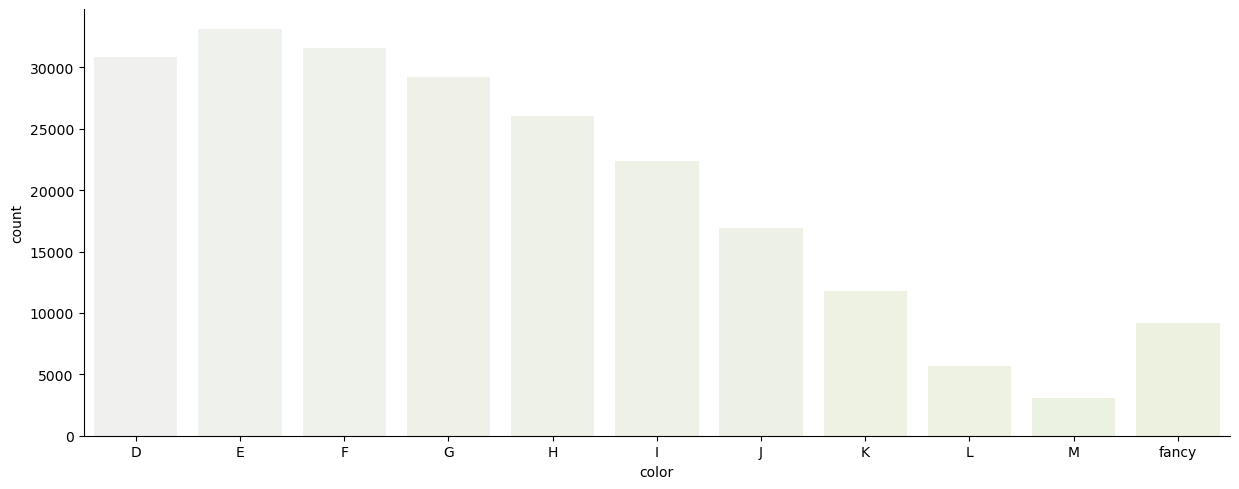

In [11]:
sns.set_palette(palette="light:#edf5dc", n_colors=11)
colors = ['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'fancy']
sns.catplot(x='color', data=df, kind='count', order=colors, aspect=2.5)

#df['color'].value_counts()d

I just want to point out that getting the column colors to mimic the diamond colors by color grade is not particularly easy.

## Clarity
Most diamonds in this data set are of good or higher quality. This is probably an indicator that highly flawed diamonds are mostly used for commercial processes

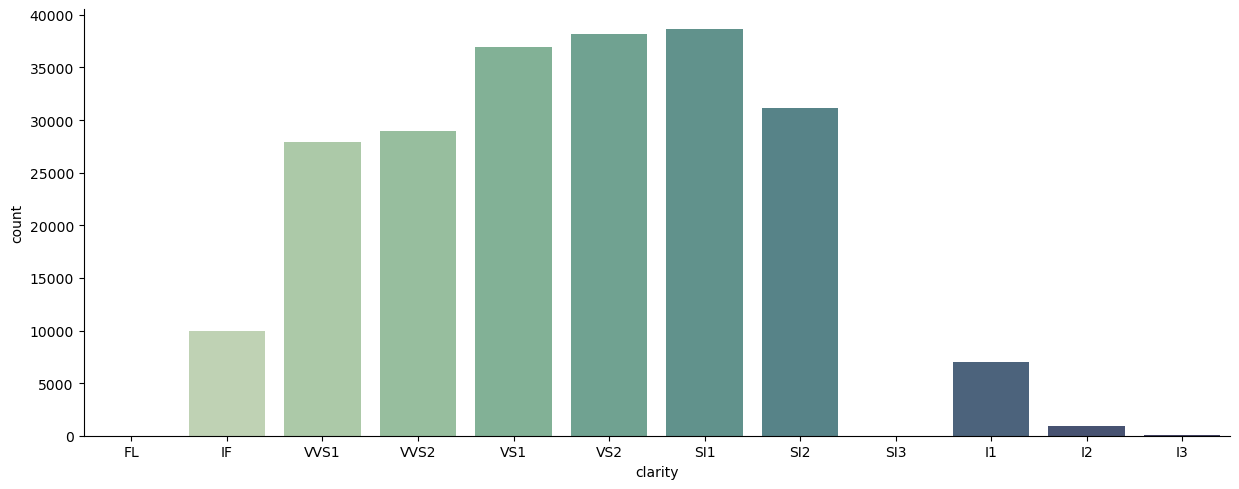

In [12]:
sns.set_palette(palette="ch:s=.55,rot=-.75", n_colors=14)

clarities = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'SI3', 'I1', 'I2', 'I3']
sns.catplot(x='clarity', data=df, kind='count', order=clarities, aspect=2.5)

#df['clarity'].value_counts()

There are a total of 10 SI3 stones and zero Flawless stones in this dataset.

I noticed this coincided with a fairly large number of highly flawed diamonds and hypothesized they might be  which, as we noted above, are .2 carat or less but would hard to tell since they're both small and colored. That's probably not the case as there are about 8000 stones that are I-3 three and from cell 7 about 20,000 stones that are melee stones. But let's take a look. 

In [13]:
included_diamonds = df.loc[df['clarity'].isin(['I1', 'I2', 'I3'])]

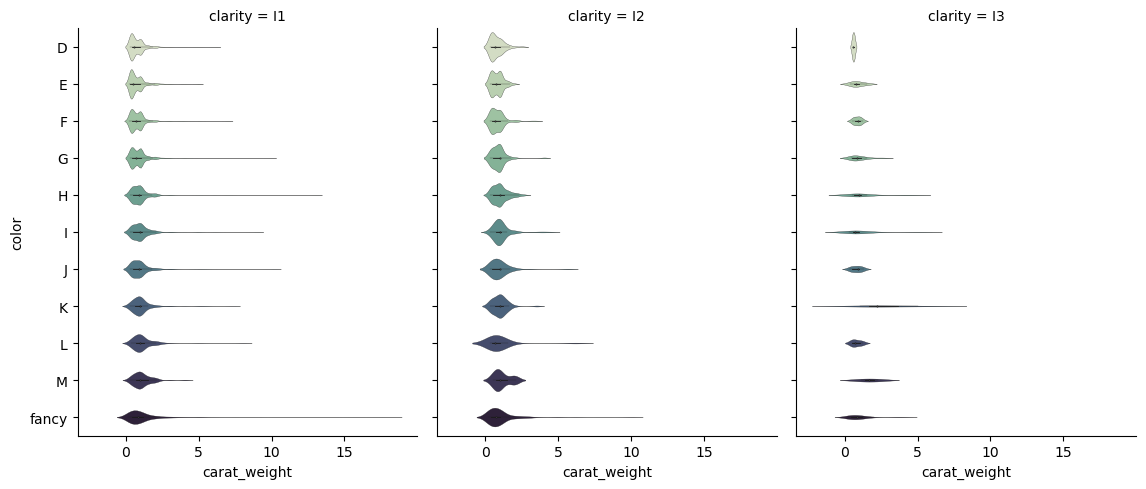

In [14]:
sns.set_palette(palette="ch:s=.55,rot=-.75", n_colors=11)

sns.catplot(
    data=included_diamonds,
    y="color", x="carat_weight", order=colors, kind='violin',
    col="clarity", col_wrap=5,
    height=5, aspect=.75, linewidth=.2,
)

We also see that included stones tend to be somewhat more colored. The combination of more heavily included and more colored tends to be a less expensive, lower quality stone.

There are very few stones that are this low in quality, particularly for I3 stones. That's probably because there are so many stones that higher across the board that there just isn't a market for it. Any lower, and they would be used for commercial purposes like cutting concrete.

Beyond that, all that can really be distilled is more colored M stone seem to be cut smaller. We could guess that at about 2.5 carats the color becomes discernible, however, it's  more likely this is because (from cells 7 & 8) most of the diamonds in this dataset -- over 90% -- are under 2.5 carats.

But this does make you wonder about the upper end stones.

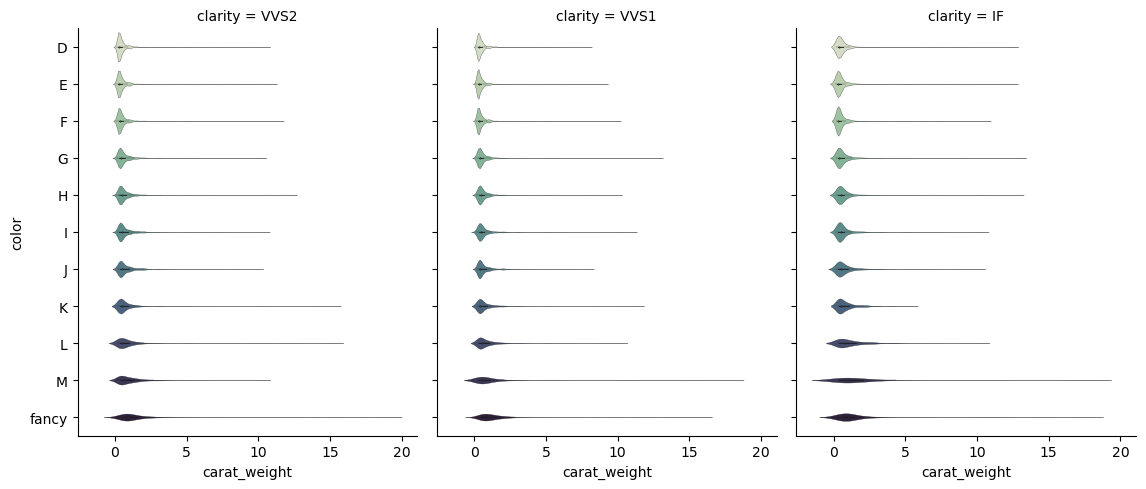

In [15]:
high_end_diamonds = df.loc[df['clarity'].isin(['IF', 'VVS1', 'VVS2'])]
sns.catplot(
    data=high_end_diamonds,
    y="color", x="carat_weight", order=colors, kind='violin',
    col="clarity", col_wrap=5,
    height=5, aspect=.75, linewidth=.2,
)

We see that while fancy diamonds tend to be slightly lower weight for the included stones, they are somewhat higher weight for the higher end stones. My suspicion would be that the lower end ones have a lot more natural stones that are rare in color but tend to be more flawed and need to be cut smaller to maintain value whereas lab grown fancy stones are trying to overcome a bias that they aren't 'real' diamonds with larger, more impressive stones. Remember, naturally occurring fancy diamonds are extremely rare

>"This is very rare stone," he says, almost to himself, in thickly accented English. "Yellow diamonds of this color are very hard to find. It is probably worth 10, maybe 15 thousand dollars."<br><br>
"I have two more exactly like it in my pocket," I tell him.<br><br>
He puts the diamond down and looks at me seriously for the first time. I place the other two stones on the table. They are all the same color and size. To find three nearly identical yellow diamonds is like flipping a coin 10,000 times and never seeing tails.

[Source: Wired Magazine](https://www.wired.com/2003/09/diamond/)

But what seen here are near perfect stones, in very rare colors, and in sizes that are (in nature) also quite rare.

## Carat weight

I noticed this concided with a fairly large number of highly flawed diamonds and hypothesized they might be [melee diamonds](https://4cs.gia.edu/en-us/blog/melee-diamonds-tiny-diamonds-big-impact/) which, as we noted above, are .2 carat or less but would hard to tell since they're both small and colored. That is everything in the column with the pink line in the first chart and or to the left and beneath the pink lines in the 2nd and 3rd charts. 

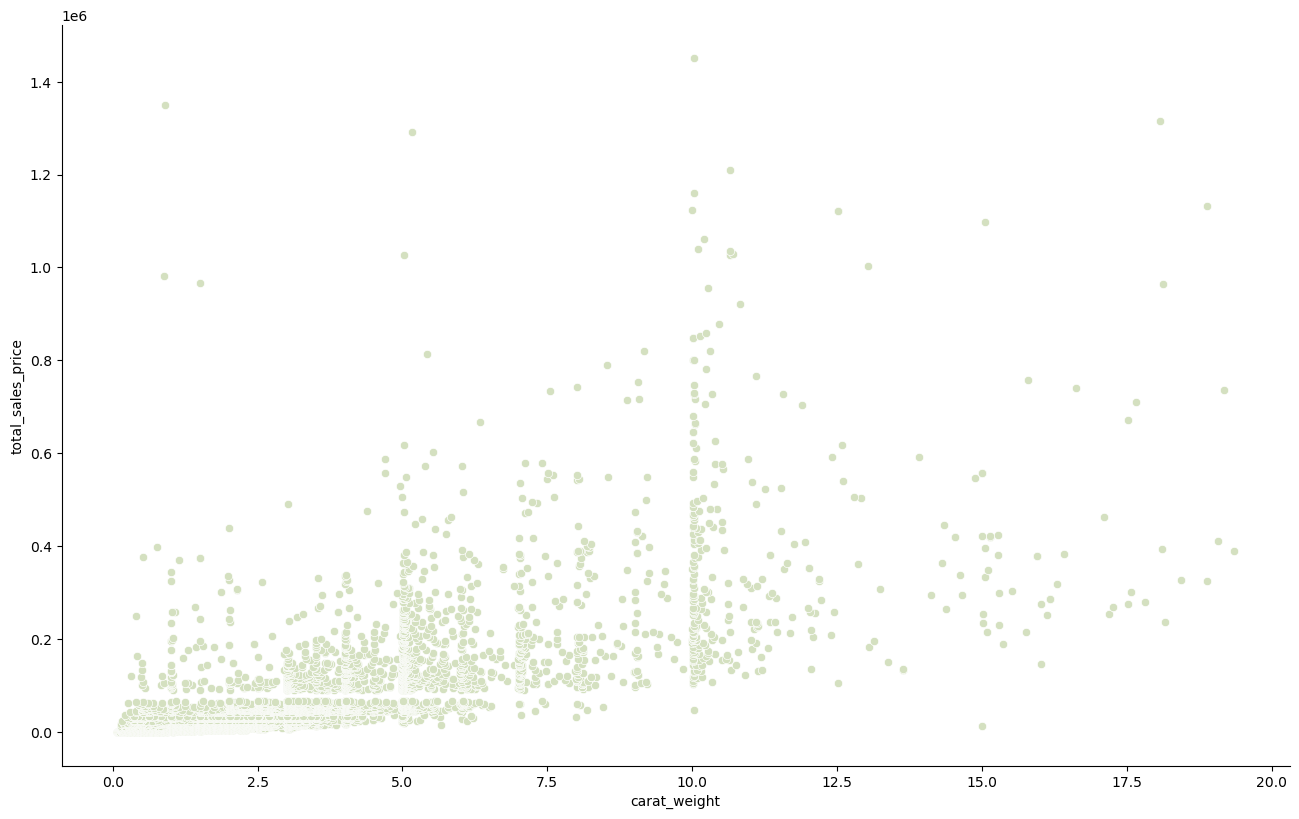

In [16]:
f = sns.relplot( data=df, x="carat_weight", y="total_sales_price")
f.figure.set_size_inches(15, 9)

The interesting thing in this chart is how there several vertical lines that represent common carat weight sizes. To me this indicates the industry knows there are certain mental breakpoints. That is a desire or a 7 carat diamond over something like a 6.77 carat diamond.

### What's up with that gap around \$1000?
There is also seems to be a price breakpoint at around $1000 which probably is some sort of artifact but needs to be verified as such.

In [17]:
gap_analysis = df.loc[df['total_sales_price'].between(500, 1700)]

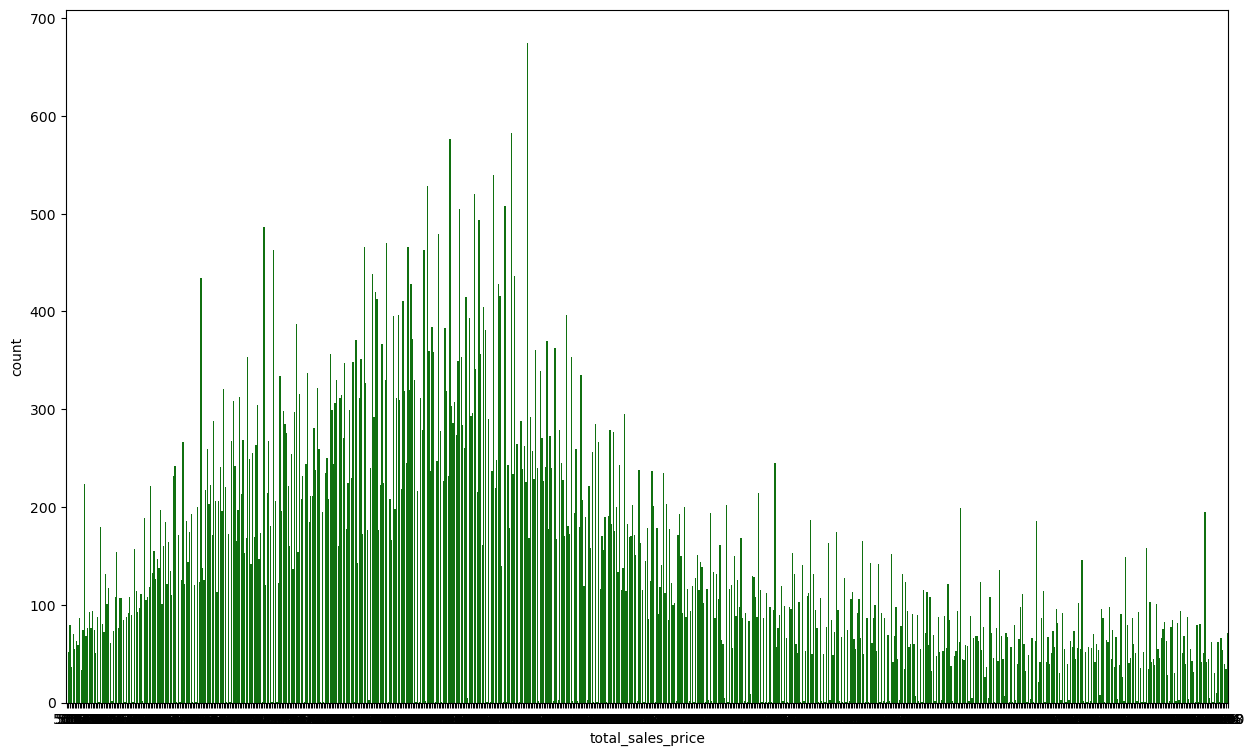

In [18]:
f = sns.countplot(data=gap_analysis, x='total_sales_price', color='green')
f.figure.set_size_inches(15, 9)

The values are continuous over the five hundred to seventeen hundred dollarrange. If there was a break, I'd expect to see it here too.

The pairplot below takes a bit of time to run and generates lot of charts that look like there they have pretty good correlation. In reality, however, they're colinear. For example, the length, width and depth of diamond is a function of it's carat weight.

So, I don't think it's really is very helpful overall. However, it does illustrate a good point so it's worth running at least once.

In [19]:
#sns.pairplot(df, hue='cut', height=2.5)

### Combination related questions

I have a few questions and it makes sense to drill down on a couple of them.

1. Are melee sized colored diamonds uncommon? It seems like they would be hard to see.

In [20]:
fancy_diamonds = df.loc[df['fancy_color_dominant_color'] != 'unknown' ]
small_fancy_diamonds = fancy_diamonds.loc[df['carat_weight'] <= .2 ].reindex()
small_fancy_diamonds

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
7708,Round,fancy,VVS1,0.19,Excellent,IGI,Very Good,Excellent,unknown,unknown,...,2.26,TN,STK,unknown,None,Yellow,unknown,None,Fancy,616
7709,Round,fancy,SI1,0.19,Very Good,IGI,Very Good,Excellent,unknown,unknown,...,2.27,STK,TK,unknown,None,Yellow,unknown,None,Fancy,616
7710,Round,fancy,VS2,0.19,Excellent,IGI,Very Good,Excellent,unknown,unknown,...,2.25,VTN,M,unknown,None,Yellow,unknown,None,Fancy Light,616
7711,Round,fancy,VVS2,0.19,Very Good,IGI,Very Good,Very Good,unknown,unknown,...,2.26,STK,TK,unknown,None,Yellow,unknown,None,Fancy,616
7712,Round,fancy,VS2,0.19,Excellent,IGI,Excellent,Excellent,unknown,unknown,...,2.23,M,STK,unknown,None,Yellow,unknown,None,Fancy,616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200026,Pear,fancy,SI2,0.20,unknown,GIA,Good,Very Good,unknown,unknown,...,1.96,TK,XTK,unknown,Faint,Pink,unknown,unknown,Fancy,16200
200035,Emerald,fancy,VS1,0.15,unknown,GIA,Good,Good,unknown,N,...,1.58,M,VTK,unknown,Faint,Pink,unknown,unknown,Fancy Intense,16200
204086,Radiant,fancy,VS1,0.20,unknown,GIA,Good,Very Good,Yes,N,...,1.78,unknown,unknown,unknown,None,Blue,unknown,unknown,Fancy,18000
205701,Cushion Modified,fancy,SI2,0.20,unknown,GIA,Very Good,Very Good,unknown,unknown,...,2.11,M,XTK,unknown,None,Green,unknown,unknown,Fancy Intense,19800


### Which cuts are more common at higher carat weights?

In [21]:
ten_carats_and_up = df.loc[df['carat_weight'] >= 10].reindex()
binned_values = ten_car.loc[df['cut'] != 'Round'].reindex()

NameError: name 'ten_car' is not defined

In [ ]:
f, ax = plt.subplots(figsize=(15, 9))

sp1 = sns.histplot(binned_values, x="carat_weight", 
                   hue="cut", hue_order=shapes,
                   stat="count", 
                   multiple="stack", palette="colorblind", fill=True)

ax.set_title('10+ carat diamonds')
ax.set_xlabel('caret weight')
ax.set_ylabel('count')
legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
ax.legend(handles, shapes, title='Cut')
plt.show()

Segmenting 

I read that a 1 carat diamond costs range between [1800 and 12000](https://www.diamonds.pro/education/1-carat-diamond-ring/) dollars. But, as of Mar 2023, $2600 is the low end for natural diamonds though you could certainly do it with a lab grown diamond. 

How would that segment?

Is the increase in price just a good sales person? Or is there an increase in clarity, color, or another factor that isn't one of the 4Cs?

In [ ]:
one_carat_diamonds = df.loc[df['carat_weight'].between(.9, 1.2)].reindex()
# one_carat_diamonds  # 30684 rows

In [ ]:
one_carat_wi_range = one_carat_diamonds.loc[df['total_sales_price'].between(1800, 12000)].reindex()
# one_carat_wi_range  # brings down to 28242 rows

In [ ]:
f=sns.catplot(data=one_carat_wi_range, x="cut", y="total_sales_price",
              kind="boxen", color=".9", order=shapes, palette="colorblind")

f.figure.set_size_inches(15, 6)
f.fig.suptitle('One carat diamonds (give or take) between 1800 and 12k');

![Diamond Shapes](../images/Diamond_shapes.png)

In [ ]:
sns.set_palette(palette="light:#edf5dc", n_colors=11)
colors = ['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'fancy']
f=sns.catplot(data=one_carat_wi_range, x="color", y="total_sales_price",
              kind="boxen", order=colors)

f.figure.set_size_inches(15, 3)

In [ ]:
sns.set_palette(palette='Blues', n_colors=12)
clarities = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'SI3', 'I1', 'I2', 'I3']
f=sns.catplot(data=one_carat_wi_range, x="clarity", y="total_sales_price",
              kind="boxen", order=clarities)

f.figure.set_size_inches(15, 3)

In [ ]:
cut_qualities =['Excellent', 'Very Good', 'Good', 'Fair', 'Ideal'] 
sns.set_palette(palette='Greens', n_colors=5)
f=sns.catplot(data=one_carat_wi_range, x="cut_quality", y="total_sales_price",
              kind="boxen", order=cut_qualities)

f.figure.set_size_inches(15, 3)

We're finally at the point where we could some good advice to both Sarah and her suitor, Greg Mills who is an engineer.

To Greg:
Look for princess, marquise, or pear shaped diamond that's I or J colored and has a clarity of SI1 or SI2 with a very good or better cut. Get a natural stone as they are holding their values better now. On the other hand you could get a lab grown one if you not planning on selling this one later, really like the technical aspect or 

That will run about:

 * 1600 for a princess-cut or you could get a 1.25 Carat H VS1  princess that is lab-grown for the same price. 
 * 2200 for a marquise. For the same price you could get a Lab-Created 1.42 Carat F SI2. 
 * 2000 for a natural 1.01 Carat J SI2 pear-shaped diamond for $2020. 

Note this doesn't include the setting. However, on the plus side, that's a considerable savings over $2600 for a similar round cut diamond. And I'm sure you can use the price delta for other things like couples counseling. 


## EDA - exercises for the reader.

#### Here are few questions that should be pretty easy to answer:

  * Do some cuts command a higher price in general?
  * Which cuts are more common at higher carat weights?
  * Amongst fancy diamonds, what colors are more valued? What trends are there in clarity?
  

## Wrap this up with a hypothesis

EDA is fun and all but it's about time develop a model for pricing. According to the write up for the actual *Sarah Gets a Diamond* dataset, Greg Mills is planning to use a regression model and that's a pretty obvious choice. But there's not really any science if there isn't a falsifiable hypothesis. So, sticking with the Cut, Color, Clarity, and Carat Weight order above ...

**Cut** I think are a matter of preference but from the EDA so far, we've seen there is an effect. I think it will be greater for very large diamonds. 

**Color** and **Clarity** I don't think people can discern either of these and in the aggregate they have a smallish effect. While I don't think it can be tested with a model, I don't most really care about color because they really can't see it easily.  A bad culut condition might have some negative impact but I don't think it will be much because there shouldn't be that many and the others could be concealed by the setting. So, any effect will be more due to a salesperson's patter than purchaser's perception. **Eye Clean** because its defined by what can be seen with the eye might have a greater effect.

**Carat Weight** I feel confident this is the main driver by far.

Also, I'm putting my money on `XGBoost` which, I think, is a another very safe bet.

#### And, finally, to Sarah:

Guuuuurl! You can do better. I mean anybody who is going to buy a diamond off just the price is just not. Seriously.